In [3]:
true_labels= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [4]:
predicted_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 6, 1, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 0, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 5, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted_labels, true_labels)

In [6]:
cm

array([[10,  1,  0,  0,  2,  0,  0,  1,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 16,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  9,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10]])

Text(95.5815972222222, 0.5, 'True Class')

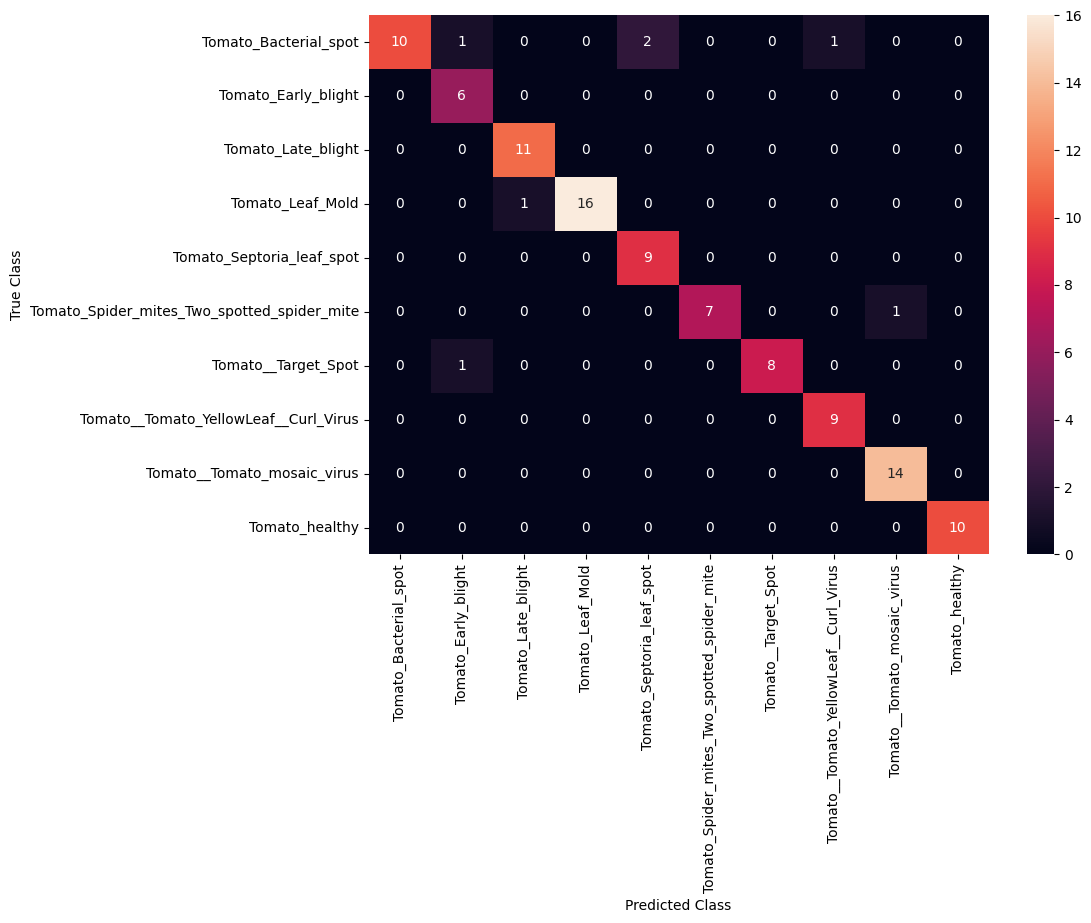

In [7]:
import matplotlib.pylab as plt
import seaborn as sn
labels = ['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Class')
plt.ylabel('True Class')

In [8]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')

print('Precision: ', precision)
print('Recall: ', recall)

l = len(true_labels)
acc = sum([predicted_labels[i] == true_labels[i] for i in range(l)]) / l
print('Accuracy: ', acc)

Precision:  0.9419351073762838
Recall:  0.9318181818181819
Accuracy:  0.9345794392523364


In [9]:
from sklearn.metrics import classification_report
print(classification_report(true_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.75      0.86         8
           2       1.00      0.92      0.96        12
           3       0.94      1.00      0.97        16
           4       1.00      0.82      0.90        11
           5       0.88      1.00      0.93         7
           6       0.89      1.00      0.94         8
           7       1.00      0.90      0.95        10
           8       1.00      0.93      0.97        15
           9       1.00      1.00      1.00        10

    accuracy                           0.93       107
   macro avg       0.94      0.93      0.93       107
weighted avg       0.95      0.93      0.94       107



In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy=",accuracy_score(true_labels,predicted_labels))
print("F1 Score=",f1_score(true_labels,predicted_labels, average="macro"))
print("Precision=",precision_score(true_labels,predicted_labels, average="macro"))
print("Recall=",recall_score(true_labels,predicted_labels, average="macro"))

Accuracy= 0.9345794392523364
F1 Score= 0.9304090365657105
Precision= 0.9419351073762838
Recall= 0.9318181818181819


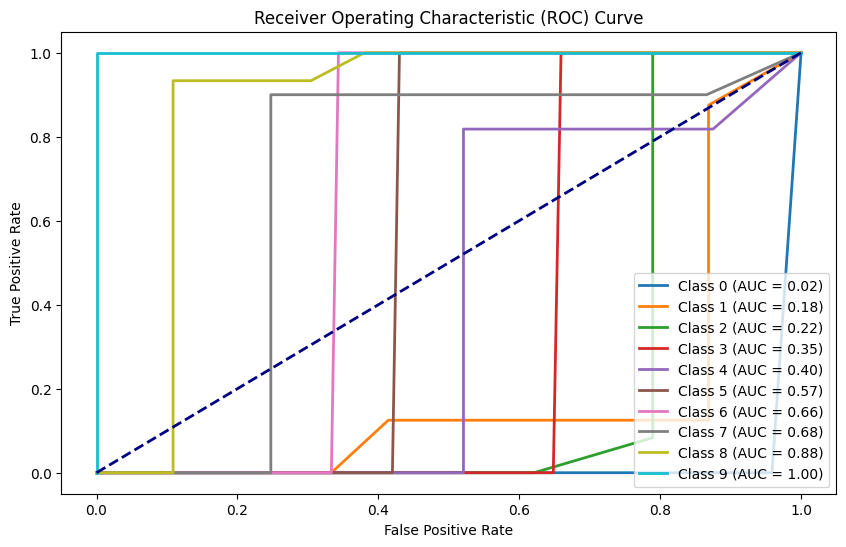

In [11]:
import matplotlib.pylab as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

num_classes = len(set(true_labels))

binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(binarized_true_labels[:, i], predicted_labels)

    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



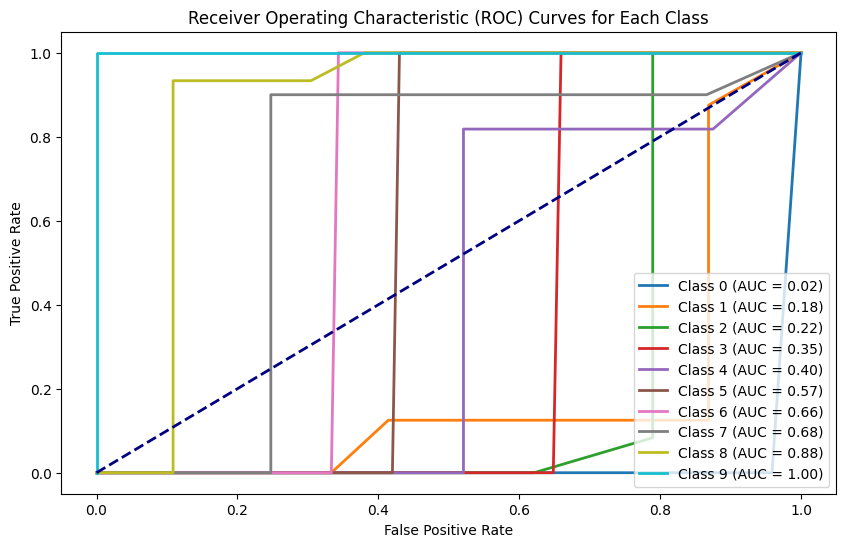

In [12]:
import matplotlib.pylab as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
num_classes = len(set(true_labels))

binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_true_labels[:, i], predicted_labels)  # Changed this line
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.legend(loc='lower right')
plt.show()

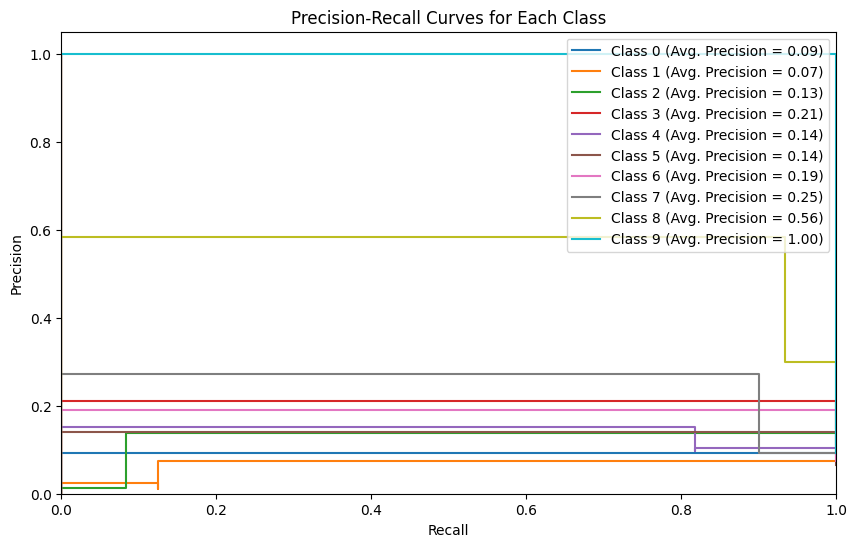

In [13]:
import matplotlib.pylab as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

num_classes = len(set(true_labels))

binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))

precision = dict()
recall = dict()
average_precision = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(
        binarized_true_labels[:, i], predicted_labels
    )
    average_precision[i] = average_precision_score(
        binarized_true_labels[:, i], predicted_labels
    )

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.step(
        recall[i],
        precision[i],
        where="post",
        label=f"Class {i} (Avg. Precision = {average_precision[i]:.2f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-Recall Curves for Each Class")
plt.legend(loc="upper right")
plt.show()

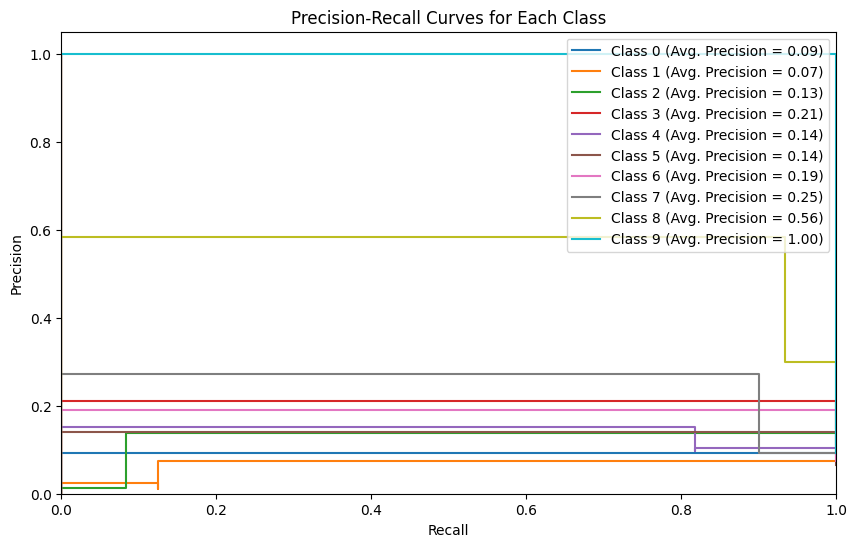

In [14]:
import matplotlib.pylab as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
num_classes = len(set(true_labels))
binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))

precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(
        binarized_true_labels[:, i], predicted_labels
    )
    average_precision[i] = average_precision_score(
        binarized_true_labels[:, i], predicted_labels
    )

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.step(
        recall[i],
        precision[i],
        where="post",
        label=f"Class {i} (Avg. Precision = {average_precision[i]:.2f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-Recall Curves for Each Class")
plt.legend(loc="upper right")
plt.show()

In [15]:
acc= [0.19567826390266418,
 0.5462185144424438,
 0.732292890548706,
 0.8127250671386719,
 0.8751500844955444,
 0.9135653972625732,
 0.9279711842536926,
 0.9399759769439697,
 0.9675870537757874,
 0.9651860594749451,
 0.9651860594749451,
 0.971188485622406,
 0.971188485622406,
 0.9747899174690247,
 0.9843937754631042,
 0.989195704460144,
 0.9795918464660645,
 0.9723889827728271,
 0.989195704460144,
 0.9855942130088806,
 0.9843937754631042,
 0.989195704460144,
 0.9879952073097229,
 0.9807923436164856,
 0.9879952073097229,
 0.9939975738525391,
 0.9879952073097229,
 0.9879952073097229,
 0.989195704460144,
 0.9915966391563416,
 0.9975990653038025,
 0.981992781162262,
 0.9939975738525391,
 0.9867947101593018,
 0.9939975738525391,
 0.9963985681533813,
 0.9915966391563416,
 0.9963985681533813,
 0.9975990653038025,
 0.9951980710029602,
 0.9855942130088806,
 0.9939975738525391,
 0.9951980710029602,
 0.9975990653038025,
 0.9939975738525391,
 0.9975990653038025,
 0.9951980710029602,
 0.9963985681533813,
 0.9987995028495789,
 0.9963985681533813,
 0.9963985681533813,
 0.9963985681533813,
 0.9903961420059204,
 0.9951980710029602,
 0.9939975738525391,
 0.9939975738525391,
 0.9939975738525391,
 0.9915966391563416,
 0.9915966391563416,
 0.9963985681533813,
 0.9951980710029602,
 0.9903961420059204,
 0.9975990653038025,
 0.9963985681533813,
 0.9963985681533813,
 0.9963985681533813,
 0.9975990653038025,
 0.9975990653038025,
 0.9963985681533813,
 0.9987995028495789,
 0.9939975738525391,
 0.9963985681533813,
 0.9975990653038025,
 0.9975990653038025,
 0.9963985681533813,
 0.9975990653038025,
 0.9963985681533813,
 0.9963985681533813,
 1.0,
 0.9963985681533813,
 0.9963985681533813,
 0.9915966391563416,
 0.9987995028495789,
 0.9927971363067627,
 0.9963985681533813,
 0.9963985681533813,
 0.9987995028495789,
 0.9963985681533813,
 0.9903961420059204,
 0.9975990653038025,
 0.9963985681533813,
 0.9963985681533813,
 0.9939975738525391,
 0.9939975738525391,
 0.9963985681533813,
 0.9987995028495789,
 0.9963985681533813,
 0.9975990653038025,
 0.9975990653038025,
 0.9951980710029602]

In [2]:
val_acc=[0.2710280418395996,
 0.5046728849411011,
 0.5794392228126526,
 0.7009345889091492,
 0.7663551568984985,
 0.7476635575294495,
 0.84112149477005,
 0.8971962332725525,
 0.8878504633903503,
 0.8504672646522522,
 0.8878504633903503,
 0.8878504633903503,
 0.9065420627593994,
 0.9252336621284485,
 0.9345794320106506,
 0.9345794320106506,
 0.8598130941390991,
 0.9719626307487488,
 0.9626168012619019,
 0.9252336621284485,
 0.9252336621284485,
 0.9439252614974976,
 0.9532710313796997,
 0.9252336621284485,
 0.9065420627593994,
 0.9345794320106506,
 0.9252336621284485,
 0.9252336621284485,
 0.9345794320106506,
 0.9345794320106506,
 0.9439252614974976,
 0.9345794320106506,
 0.9439252614974976,
 0.9532710313796997,
 0.9439252614974976,
 0.9532710313796997,
 0.9626168012619019,
 0.9252336621284485,
 0.9345794320106506,
 0.9345794320106506,
 0.9252336621284485,
 0.9345794320106506,
 0.9158878326416016,
 0.9065420627593994,
 0.9439252614974976,
 0.9626168012619019,
 0.9439252614974976,
 0.9439252614974976,
 0.9439252614974976,
 0.9345794320106506,
 0.9439252614974976,
 0.9532710313796997,
 0.9252336621284485,
 0.9252336621284485,
 0.9439252614974976,
 0.9158878326416016,
 0.9626168012619019,
 0.9532710313796997,
 0.9626168012619019,
 0.9439252614974976,
 0.9345794320106506,
 0.9252336621284485,
 0.9345794320106506,
 0.9439252614974976,
 0.9158878326416016,
 0.9439252614974976,
 0.9345794320106506,
 0.9252336621284485,
 0.9345794320106506,
 0.9252336621284485,
 0.9626168012619019,
 0.9439252614974976,
 0.9532710313796997,
 0.9626168012619019,
 0.9345794320106506,
 0.9439252614974976,
 0.9345794320106506,
 0.9439252614974976,
 0.9345794320106506,
 0.9439252614974976,
 0.9532710313796997,
 0.9626168012619019,
 0.9626168012619019,
 0.9439252614974976,
 0.9626168012619019,
 0.9626168012619019,
 0.9626168012619019,
 0.9532710313796997,
 0.9532710313796997,
 0.9626168012619019,
 0.9532710313796997,
 0.9345794320106506,
 0.9532710313796997,
 0.9626168012619019,
 0.9532710313796997,
 0.9439252614974976,
 0.9532710313796997,
 0.9532710313796997,
 0.9532710313796997,
 0.9439252614974976]

In [16]:
loss=[2.219553232192993,
 1.485703706741333,
 0.9458014965057373,
 0.632270872592926,
 0.472286581993103,
 0.3246145248413086,
 0.26533496379852295,
 0.22812944650650024,
 0.15945132076740265,
 0.13705585896968842,
 0.13058750331401825,
 0.1274251788854599,
 0.11152811348438263,
 0.08873816579580307,
 0.06529829651117325,
 0.06043410673737526,
 0.09466661512851715,
 0.08430621773004532,
 0.06450066715478897,
 0.061865709722042084,
 0.053876183927059174,
 0.05138660967350006,
 0.05361928045749664,
 0.06337606906890869,
 0.04789717495441437,
 0.030108800157904625,
 0.046274468302726746,
 0.04706986993551254,
 0.034282393753528595,
 0.0354577861726284,
 0.021493123844265938,
 0.044776998460292816,
 0.035723209381103516,
 0.04314172640442848,
 0.025824453681707382,
 0.03227096050977707,
 0.03751938045024872,
 0.01836519129574299,
 0.01819198951125145,
 0.023230424150824547,
 0.044579990208148956,
 0.02028985507786274,
 0.02547585591673851,
 0.013396985828876495,
 0.03184865042567253,
 0.01951305754482746,
 0.017817165702581406,
 0.017731891945004463,
 0.012217246927320957,
 0.016217278316617012,
 0.01759937033057213,
 0.015681559219956398,
 0.030221013352274895,
 0.019903115928173065,
 0.023359160870313644,
 0.02211509831249714,
 0.01634853519499302,
 0.023093437775969505,
 0.021832499653100967,
 0.01856309175491333,
 0.017140142619609833,
 0.028085466474294662,
 0.014074434526264668,
 0.015256587415933609,
 0.021521465852856636,
 0.015147034078836441,
 0.01802176982164383,
 0.012845994904637337,
 0.01709137298166752,
 0.01264434214681387,
 0.014873671345412731,
 0.014907028526067734,
 0.011896922253072262,
 0.012016275897622108,
 0.016164522618055344,
 0.011721714399755001,
 0.014544801786541939,
 0.01131334900856018,
 0.007773039396852255,
 0.01556350663304329,
 0.01286249328404665,
 0.020282607525587082,
 0.010339323431253433,
 0.0283763837069273,
 0.013200031593441963,
 0.011813730001449585,
 0.010468756780028343,
 0.015977822244167328,
 0.03676668554544449,
 0.011022258549928665,
 0.01723945327103138,
 0.014579882845282555,
 0.021828418597579002,
 0.016092298552393913,
 0.011355993337929249,
 0.010849912650883198,
 0.01597241871058941,
 0.011151837185025215,
 0.013101084157824516,
 0.015327543020248413]

In [17]:
val_loss=[1.9374369382858276,
 1.430956244468689,
 1.1044914722442627,
 0.8904427289962769,
 0.6546551585197449,
 0.8034469485282898,
 0.4724010229110718,
 0.3502270579338074,
 0.39690101146698,
 0.5251755714416504,
 0.33327969908714294,
 0.3541092574596405,
 0.3254922926425934,
 0.2877652645111084,
 0.27221742272377014,
 0.25845983624458313,
 0.4209616780281067,
 0.20015765726566315,
 0.21344059705734253,
 0.24739980697631836,
 0.23246334493160248,
 0.1687307059764862,
 0.20189568400382996,
 0.2325592339038849,
 0.2414151281118393,
 0.21613194048404694,
 0.2580857574939728,
 0.23561586439609528,
 0.1598760187625885,
 0.2077215611934662,
 0.18901287019252777,
 0.18598738312721252,
 0.1897200644016266,
 0.16331475973129272,
 0.18164950609207153,
 0.12944594025611877,
 0.1661713570356369,
 0.21672813594341278,
 0.1781006157398224,
 0.1776958405971527,
 0.2933885157108307,
 0.29608219861984253,
 0.28298938274383545,
 0.29597023129463196,
 0.1900559365749359,
 0.15986935794353485,
 0.14231979846954346,
 0.14540782570838928,
 0.14526169002056122,
 0.15020526945590973,
 0.1585511863231659,
 0.1754867285490036,
 0.1862451285123825,
 0.22473804652690887,
 0.20911578834056854,
 0.29809674620628357,
 0.1990923285484314,
 0.19476333260536194,
 0.21393558382987976,
 0.20684677362442017,
 0.19343537092208862,
 0.21736931800842285,
 0.28683337569236755,
 0.25836285948753357,
 0.1840672343969345,
 0.1544792652130127,
 0.20992222428321838,
 0.2987947165966034,
 0.20216169953346252,
 0.21457642316818237,
 0.19920793175697327,
 0.1790980100631714,
 0.1743786782026291,
 0.18485814332962036,
 0.16823545098304749,
 0.20365215837955475,
 0.23574359714984894,
 0.22180502116680145,
 0.21191036701202393,
 0.16232067346572876,
 0.15002529323101044,
 0.13621215522289276,
 0.18903367221355438,
 0.18609903752803802,
 0.13405033946037292,
 0.1544705033302307,
 0.14494435489177704,
 0.14705488085746765,
 0.19412823021411896,
 0.18566885590553284,
 0.17839349806308746,
 0.25815707445144653,
 0.1644139140844345,
 0.1418168842792511,
 0.154246523976326,
 0.1679154932498932,
 0.13072285056114197,
 0.13169674575328827,
 0.16629467904567719,
 0.20424450933933258]

In [18]:
EPOCHS=100

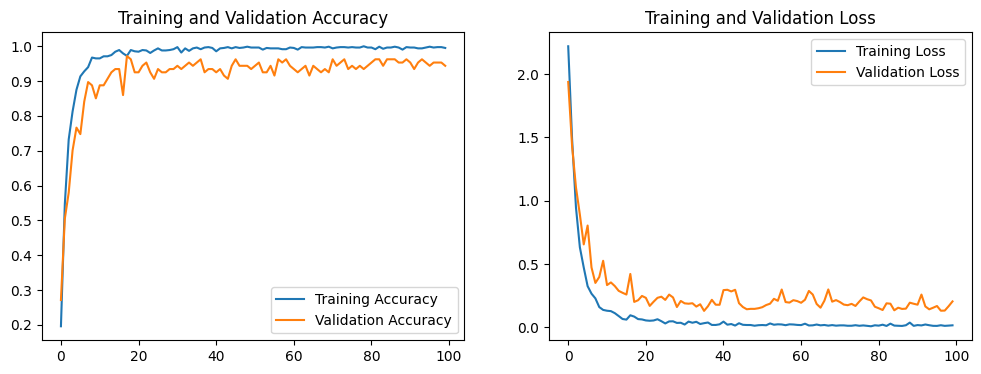

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()